In [2]:
import pandas as pd

# Data Pre-Processing

In [3]:
espam = pd.read_csv("spam.csv", encoding = 'latin-1')
espam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
espam.rename(columns = {'v1':'label','v2':'text'}, inplace = True)
espam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)
espam

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
espam['label'] = encoder.fit_transform(espam['label'])

In [7]:
espam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int32 
 1   text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [8]:
espam.duplicated().sum()
espam = espam.drop_duplicates(keep= 'first')

In [9]:
espam.duplicated().sum()

0

In [10]:
espam.shape

(5169, 2)

## EDA(Explority Data Analysis)

In [11]:
espam["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt 

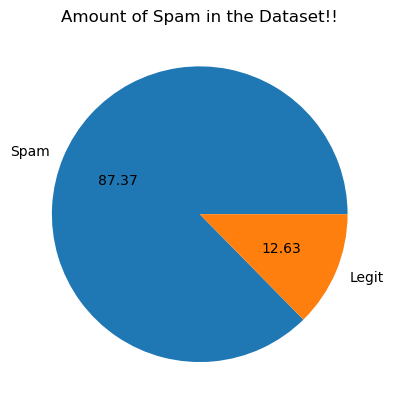

In [ ]:
plt.pie(espam["label"].value_counts(),labels=["Spam","Legit"], autopct = "%0.2f")
plt.title("Amount of Spam in this Dataset!!")
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ak212\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# number of characters in each email
espam["num_characters"] = espam["text"].apply(len)
espam["num_characters"]

C:\Users\ak212\AppData\Local\Temp\ipykernel_11928\3963038860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  espam["num_characters"] = espam["text"].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [17]:
espam.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# number of words in each email
espam["num_words"] = espam["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ak212\AppData\Local\Temp\ipykernel_11928\1359754893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  espam["num_words"] = espam["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [19]:
# number of sentences in each email
espam["num_sentences"] = espam["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ak212\AppData\Local\Temp\ipykernel_11928\2070840655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  espam["num_sentences"] = espam["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [20]:
espam

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [21]:
espam[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
espam[espam['num_characters']== 1]

,label,text,num_characters,num_words,num_sentences


In [23]:
#legit
espam[espam['label']== 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
espam[espam['label']== 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

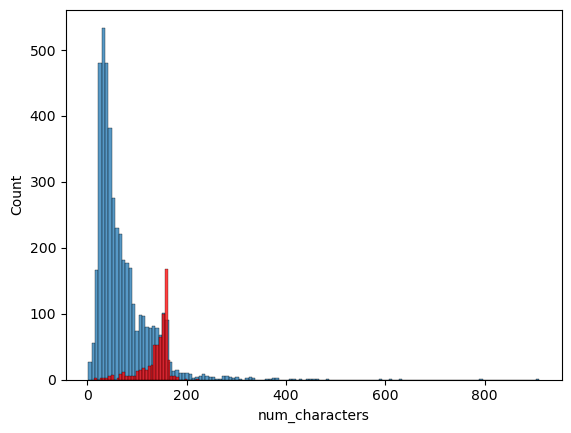

In [26]:
sns.histplot(espam[espam['label']== 0]["num_characters"])
sns.histplot(espam[espam['label']== 1]["num_characters"], color ='red')

<Axes: xlabel='num_words', ylabel='Count'>

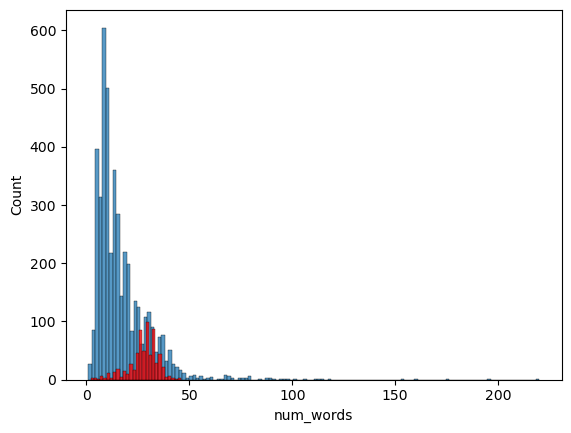

In [27]:
sns.histplot(espam[espam['label']== 0]["num_words"])
sns.histplot(espam[espam['label']== 1]["num_words"], color ='red')

C:\Users\ak212\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


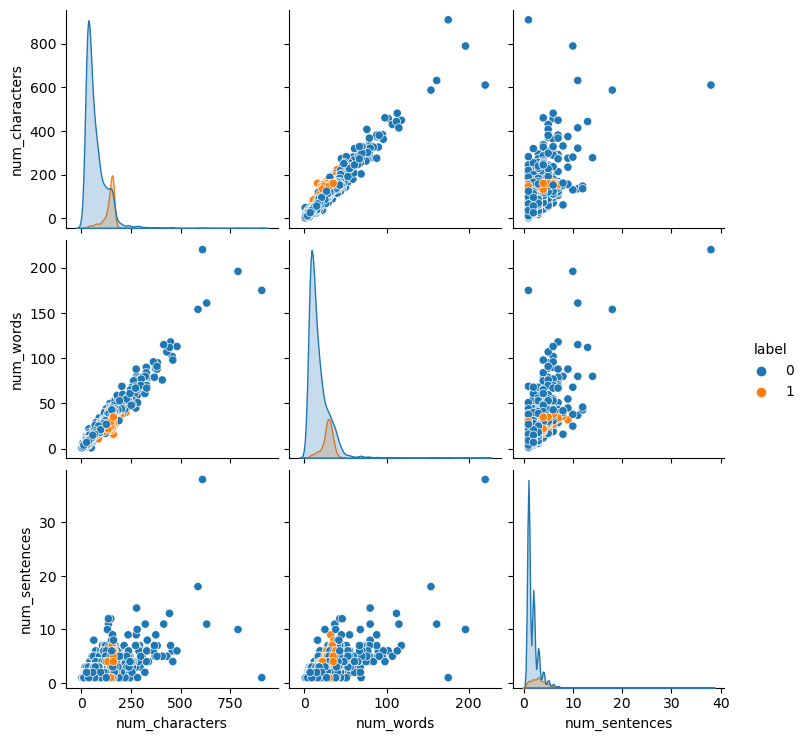

In [28]:
sns.pairplot(espam, hue ="label")

<Axes: >

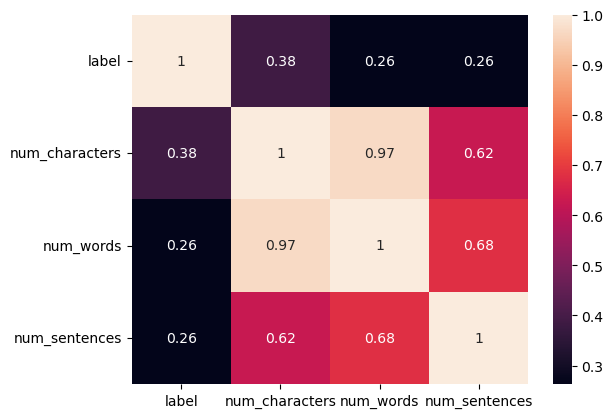

In [29]:
# Drop the non-numeric columns
espam_numeric = espam.drop(columns='text')

sns.heatmap(espam_numeric.corr(),annot = True)

# Text Preprocessing

- Lower Case
- Tokenization

- Removing stop words and punctuation
- Stemming


In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ak212\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
         y.append(ps.stem(i))
       
    
    
    return " ".join(y)

In [32]:
text_transform('Hello lovely how are you what you do @#$% ?>')

'hello love'

In [33]:
espam['text_transform'] = espam['text'].apply(text_transform)

C:\Users\ak212\AppData\Local\Temp\ipykernel_11928\3362134899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  espam['text_transform'] = espam['text'].apply(text_transform)


In [34]:
espam

,label,text,num_characters,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width= 500, height=500,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(espam[espam['label'] == 1]['text_transform'].str.cat(sep = " "))

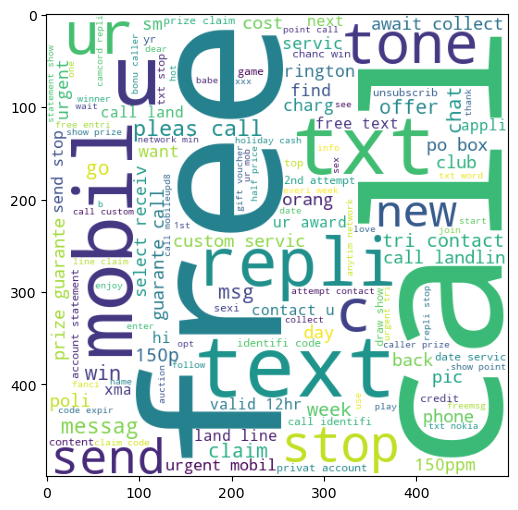

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

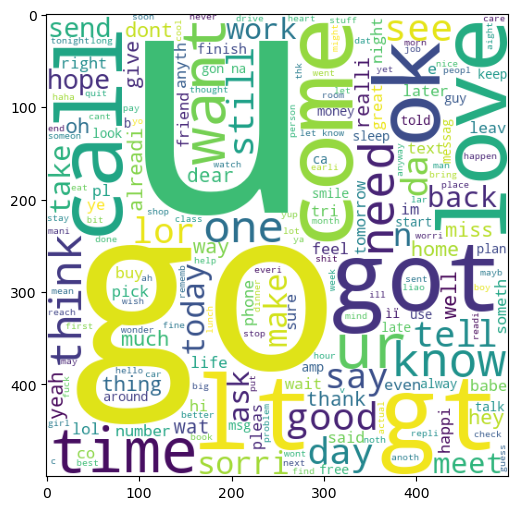

In [38]:
plt.figure(figsize=(15,6))
ham_wc = wc.generate(espam[espam['label'] == 0]['text_transform'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in espam[espam['label'] == 1]['text_transform'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
        

In [40]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [41]:
ham_corpus = []
for msg in espam[espam['label'] == 0]['text_transform'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [43]:
from collections import Counter

In [44]:
df= pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ["word","count"])

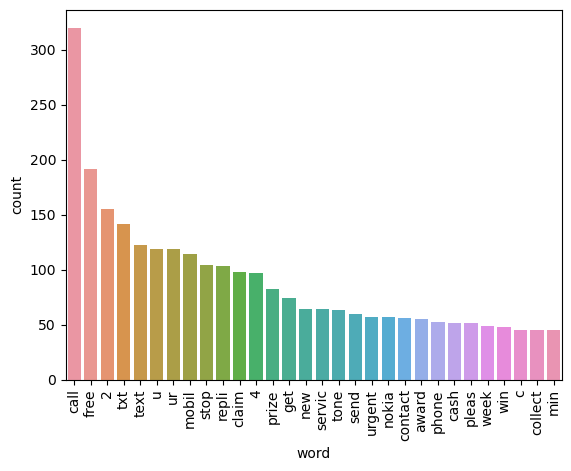

In [45]:
sns.barplot(y='count', x='word', data=df)
plt.xticks(rotation = 'vertical')
plt.show()

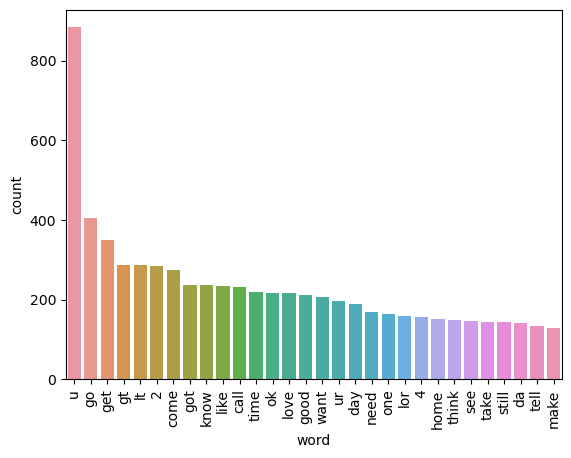

In [46]:
df= pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ["word","count"])
sns.barplot(y='count', x='word', data=df)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [47]:
#CountVectorizer = Bag of words vactor
#TfidfVectorizer = team frequency inverse document frequency vactor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tv = TfidfVectorizer(max_features=2000)

In [48]:
X = tv.fit_transform(espam['text_transform']).toarray()

In [49]:
X = tv.fit_transform(espam.iloc[:, espam.columns.get_loc('text_transform')]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
espam.iloc[:, espam.columns.get_loc('text_transform')]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text_transform, Length: 5169, dtype: object

In [51]:
X.shape

(5169, 2000)

In [52]:
Y = espam['label'].values

In [53]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
 X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [56]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
mnb = MultinomialNB()

In [59]:
# most highest accuracy_score got from 2000 max features 0.97678 with 1(100%) precision_score
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [60]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
import pickle

In [63]:
pickle.dump(tv, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))